### Data import

In [ ]:
# import kagglehub
# path = kagglehub.dataset_download("csmalarkodi/isot-fake-news-dataset")
# print("Path to dataset files:", path)
# import shutil
# shutil.copytree(path, '../data/')

In [3]:
import pandas as pd

## Data preparation

### Concatenation

In [ ]:
df_true = pd.read_csv("../data/True.csv")
df_true["fake"] = 0
df_true.head()

,title,text,subject,date,fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
df_fake = pd.read_csv("../data/Fake.csv")
df_fake["fake"] = 1
df_fake.head()

,title,text,subject,date,fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [6]:
df = pd.concat([df_true, df_fake], ignore_index=True)
df.head()

,title,text,subject,date,fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


### Removing empty values.

In [7]:
df["text"].value_counts()

text
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [8]:
df = df[~df["text"].str.strip().eq("")]

### Removing duplicates.

In [9]:
df = df.drop_duplicates()
df.head()

,title,text,subject,date,fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [10]:
df = df.reset_index(drop=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44058 entries, 0 to 44057
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44058 non-null  object
 1   text     44058 non-null  object
 2   subject  44058 non-null  object
 3   date     44058 non-null  object
 4   fake     44058 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


### Removing wrong data.

In [12]:
df["date"] = df["date"].str.strip()

In [13]:
df = df[~df["date"].str.contains("http")]

In [14]:
df = df[~df["date"].str.contains("Video")]

In [15]:
# df[df["text"].str.startswith("http")]["text"].apply(lambda x: " ".join(x.split()[1:]))

In [16]:
df.shape

(44048, 5)

In [17]:
df = df[~df["text"].str.startswith("http")]

In [18]:
df = df.reset_index(drop=True)

### Fixing dtype for date

In [19]:
df["date"] = pd.to_datetime(df["date"], format="mixed")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43963 entries, 0 to 43962
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    43963 non-null  object        
 1   text     43963 non-null  object        
 2   subject  43963 non-null  object        
 3   date     43963 non-null  datetime64[ns]
 4   fake     43963 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.7+ MB


In [67]:
df[['title', 'text', 'fake']].to_csv('clean_isot.csv', index=False)

## EDA

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

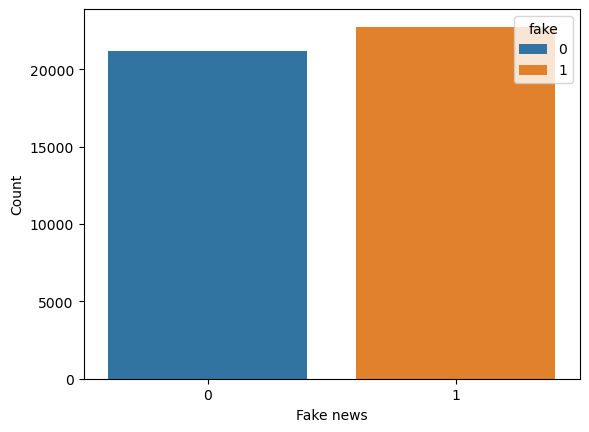

In [22]:
sns.countplot(data=df, x='fake', hue='fake')
plt.xlabel("Fake news")
plt.ylabel("Count")

In [23]:
count_of_words = [len(x) for x in df['text'].str.split()]

In [24]:
words_df = pd.DataFrame([count_of_words, df['fake']]).transpose()
words_df.columns = ['count', 'fake']
words_df

,count,fake
0,749,0
1,624,0
2,457,0
3,376,0
4,852,0
...,...,...
43958,522,1
43959,297,1
43960,4171,1
43961,456,1


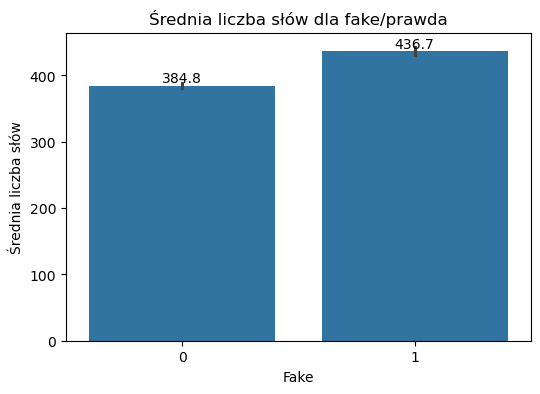

In [25]:
plt.figure(figsize=(6,4))
ax = sns.barplot(data=words_df, x="fake", y="count", estimator="mean")

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge")

plt.xlabel("Fake")
plt.ylabel("Średnia liczba słów")
plt.title("Średnia liczba słów dla fake/prawda")
plt.show()

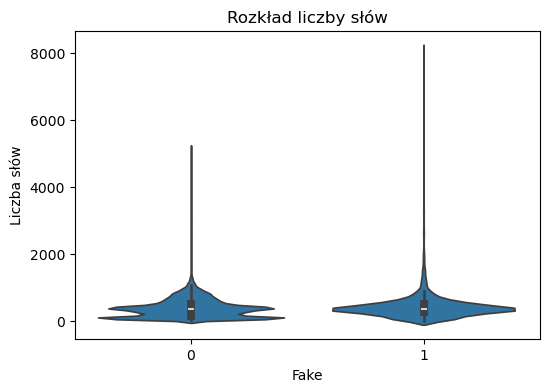

In [26]:
plt.figure(figsize=(6,4))
sns.violinplot(data=words_df, x="fake", y="count", inner="box")

plt.xlabel("Fake")
plt.ylabel("Liczba słów")
plt.title("Rozkład liczby słów")
plt.show()

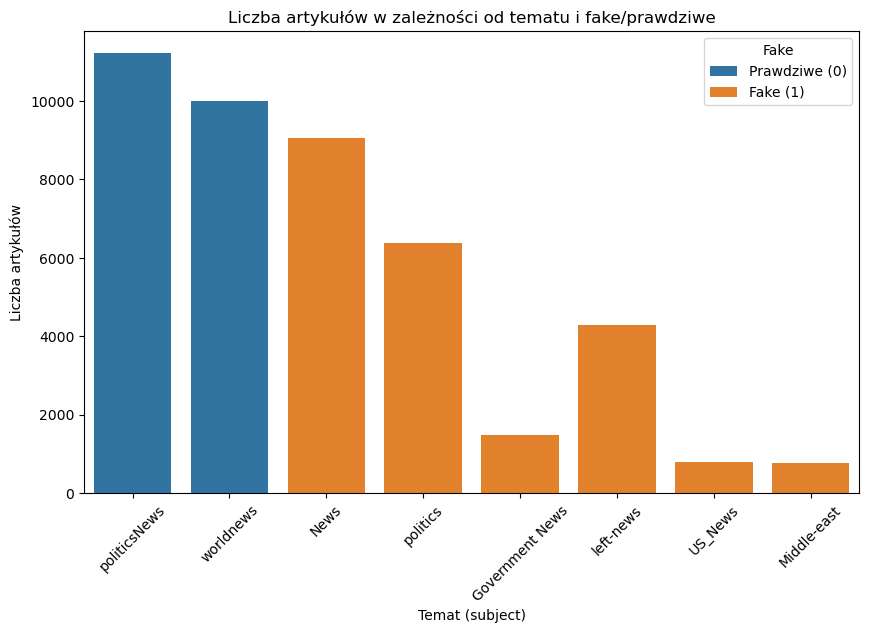

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="subject", hue="fake")
plt.xlabel("Temat (subject)")
plt.ylabel("Liczba artykułów")
plt.title("Liczba artykułów w zależności od tematu i fake/prawdziwe")
plt.xticks(rotation=45)
plt.legend(title="Fake", labels=["Prawdziwe (0)", "Fake (1)"])
plt.show()

In [28]:
df['date'].min(), df['date'].max()

(Timestamp('2015-03-31 00:00:00'), Timestamp('2018-02-19 00:00:00'))

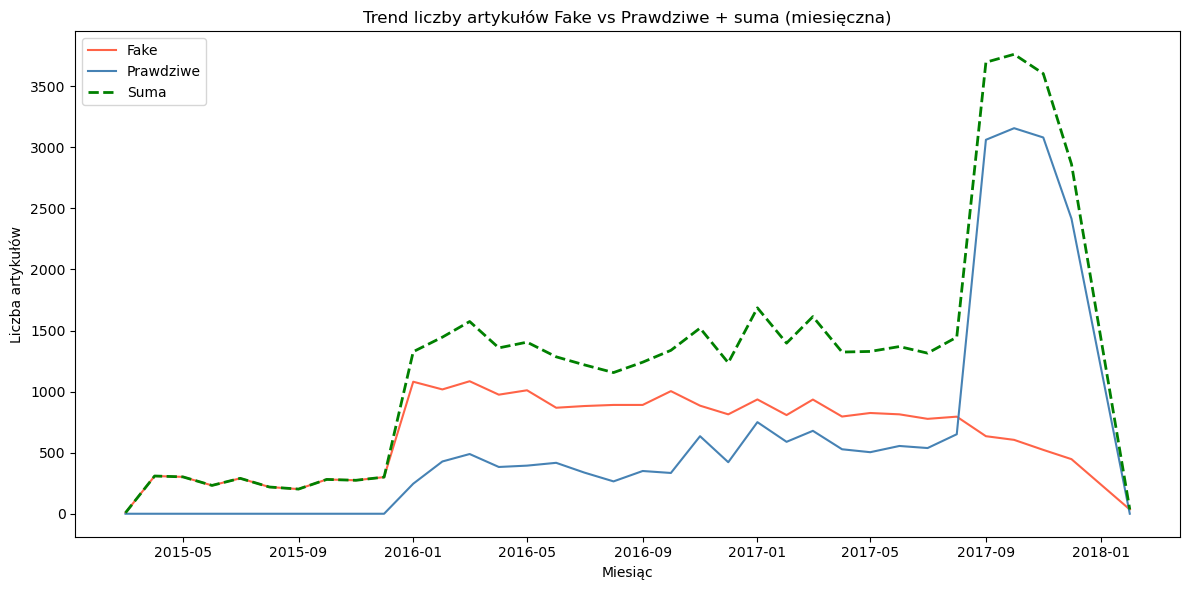

In [29]:
counts_by_month = (
    df.groupby([df["date"].dt.to_period("M"), "fake"])
    .size()
    .unstack(fill_value=0)
)

# zmiana Period -> datetime (środek miesiąca), żeby matplotlib ładnie rysował
counts_by_month.index = counts_by_month.index.to_timestamp()

# ładne nazwy kolumn
counts_by_month.columns = ["Prawdziwe", "Fake"]

# dodanie kolumny z sumą
counts_by_month["Suma"] = counts_by_month["Fake"] + counts_by_month["Prawdziwe"]

# wykres
plt.figure(figsize=(12,6))
plt.plot(counts_by_month.index, counts_by_month["Fake"], label="Fake", color="tomato")
plt.plot(counts_by_month.index, counts_by_month["Prawdziwe"], label="Prawdziwe", color="steelblue")
plt.plot(counts_by_month.index, counts_by_month["Suma"], label="Suma", color="green", linestyle="--", linewidth=2)

plt.xlabel("Miesiąc")
plt.ylabel("Liczba artykułów")
plt.title("Trend liczby artykułów Fake vs Prawdziwe + suma (miesięczna)")
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
import re

In [31]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dominikakokoryk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:

#np. in, at, on, an, and, but, or

# def preprocess_text(message):
#     message = str(message)
#     #dzielimy wiadomość na tokeny - defaultowo używamy spacji
#     tokens = message.split()
#     #zmieniamy wszystko na małe litery - lower()
#     #eliminujemy stopwords oraz cyfry, znaki interpunkcyjne
#     tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]
#     return ' '.join(tokens)

def preprocess_text(message):
    message = str(message)
    tokens = message.split()
    processed_tokens = []
    for word in tokens:
        # zmiana na małe litery
        word_lower = word.lower()
        # pomijamy stopwords
        if word_lower in stop_words:
            continue
        # usuwamy znaki interpunkcyjne i nawiasy
        word_clean = re.sub(r'[^a-zA-Z0-9]', '', word_lower)
        if word_clean:  # jeśli coś zostało po oczyszczeniu
            processed_tokens.append(word_clean)
    return ' '.join(processed_tokens)

df['processed_text'] = df['text'].apply(preprocess_text)
df.head()


,title,text,subject,date,fake,processed_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,0,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,0,washington reuters transgender people allowed ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,0,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,0,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,0,seattlewashington reuters president donald tru...


In [33]:
df['processed_text']

0        washington reuters head conservative republica...
1        washington reuters transgender people allowed ...
2        washington reuters special counsel investigati...
3        washington reuters trump campaign adviser geor...
4        seattlewashington reuters president donald tru...
                               ...                        
43958    21st century wire says 21wire reported earlier...
43959    21st century wire says familiar theme whenever...
43960    patrick henningsen 21st century wireremember o...
43961    21st century wire says al jazeera america go h...
43962    21st century wire says 21wire predicted new ye...
Name: processed_text, Length: 43963, dtype: object

In [34]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/dominikakokoryk/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

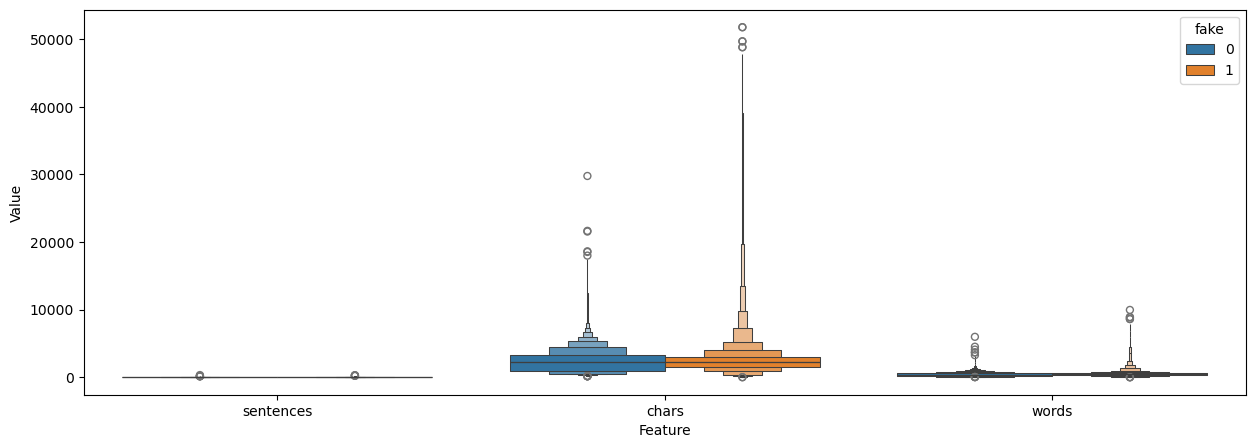

In [35]:
df['chars'] = df['text'].apply(len)
df['sentences'] = df['text'].apply(lambda corpus: nltk.sent_tokenize(corpus)).apply(len)
df['words'] = df['text'].apply(lambda document: nltk.word_tokenize(document)).apply(len)

df.describe().T
plt.show()


melted_df = df.melt(id_vars='fake', value_vars=['sentences', 'chars', 'words'], var_name='Feature', value_name='Value')

plt.figure(figsize=(15,5))
sns.boxenplot(x='Feature', y='Value', data=melted_df, hue='fake')
plt.show()

In [36]:
df['tokenized_text'] = df['processed_text'].apply(lambda document: nltk.word_tokenize(document))

In [37]:
def stopwords_removal(tokens):
    filtered_text = [word for word in tokens if word not in stop_words]
    return filtered_text

df['filtered_token'] = df['tokenized_text'].apply(stopwords_removal)

In [38]:
df['filtered_token']

0        [washington, reuters, head, conservative, repu...
1        [washington, reuters, transgender, people, all...
2        [washington, reuters, special, counsel, invest...
3        [washington, reuters, trump, campaign, adviser...
4        [seattlewashington, reuters, president, donald...
                               ...                        
43958    [21st, century, wire, says, 21wire, reported, ...
43959    [21st, century, wire, says, familiar, theme, w...
43960    [patrick, henningsen, 21st, century, wireremem...
43961    [21st, century, wire, says, al, jazeera, ameri...
43962    [21st, century, wire, says, 21wire, predicted,...
Name: filtered_token, Length: 43963, dtype: object

In [39]:
from nltk.stem import WordNetLemmatizer

In [40]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/dominikakokoryk/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [41]:
from nltk import pos_tag

In [42]:
lemmatizer = WordNetLemmatizer()

def lemmatizing(tokens):
    lemmas = [lemmatizer.lemmatize(token, pos='v') for token in tokens]
    # tagged = pos_tag(tokens)
    # lemmas = [lemmatizer.lemmatize(token, pos='v' if tag.startswith('V') else 'n') for token, tag in tagged]
    return lemmas

df['lemmatized_tokens'] = df['filtered_token'].apply(lemmatizing)

In [43]:
pd.set_option("display.max_colwidth", 100)

In [44]:
df[['filtered_token', 'lemmatized_tokens']]

,filtered_token,lemmatized_tokens
0,"[washington, reuters, head, conservative, republican, faction, us, congress, voted, month, huge,...","[washington, reuters, head, conservative, republican, faction, us, congress, vote, month, huge, ..."
1,"[washington, reuters, transgender, people, allowed, first, time, enlist, us, military, starting,...","[washington, reuters, transgender, people, allow, first, time, enlist, us, military, start, mond..."
2,"[washington, reuters, special, counsel, investigation, links, russia, president, trumps, 2016, e...","[washington, reuters, special, counsel, investigation, link, russia, president, trump, 2016, ele..."
3,"[washington, reuters, trump, campaign, adviser, george, papadopoulos, told, australian, diplomat...","[washington, reuters, trump, campaign, adviser, george, papadopoulos, tell, australian, diplomat..."
4,"[seattlewashington, reuters, president, donald, trump, called, us, postal, service, friday, char...","[seattlewashington, reuters, president, donald, trump, call, us, postal, service, friday, charge..."
...,...,...
43958,"[21st, century, wire, says, 21wire, reported, earlier, week, unlikely, mishap, two, us, naval, v...","[21st, century, wire, say, 21wire, report, earlier, week, unlikely, mishap, two, us, naval, vess..."
43959,"[21st, century, wire, says, familiar, theme, whenever, dispute, change, law, two, tribes, go, wa...","[21st, century, wire, say, familiar, theme, whenever, dispute, change, law, two, tribes, go, war..."
43960,"[patrick, henningsen, 21st, century, wireremember, obama, administration, told, world, hoped, id...","[patrick, henningsen, 21st, century, wireremember, obama, administration, tell, world, hop, iden..."
43961,"[21st, century, wire, says, al, jazeera, america, go, history, one, biggest, failures, broadcast...","[21st, century, wire, say, al, jazeera, america, go, history, one, biggest, failures, broadcast,..."


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
corpus = []
for tokens in df['lemmatized_tokens']:
    document = ' '.join([word for word in tokens])
    corpus.append(document)
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus)

y = df['fake']

In [51]:
X.shape

(43963, 215727)

In [ ]:
X

<43963x215727 sparse matrix of type '<class 'numpy.float64'>'
	with 7062248 stored elements in Compressed Sparse Row format>

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [54]:
from sklearn.metrics import classification_report

              precision    recall  f1-score
0              0.983583  0.988685  0.986127
1              0.989402  0.984619  0.987004
accuracy       0.986580  0.986580  0.986580
macro avg      0.986493  0.986652  0.986566
weighted avg   0.986595  0.986580  0.986581


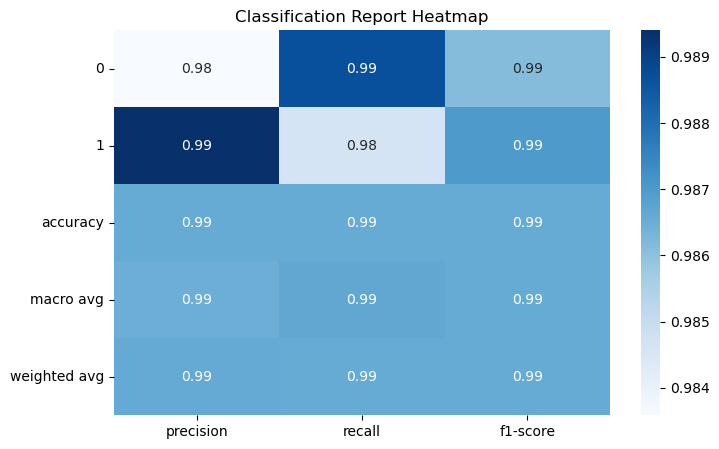

In [59]:
report = classification_report(y_test, y_pred, output_dict=True)

# konwersja do dataframe
report_df = pd.DataFrame(report).iloc[:-1, :].T  # usuwamy 'accuracy' z końca
print(report_df)

# wykres heatmap
plt.figure(figsize=(8,5))
sns.heatmap(report_df, annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4242
           1       0.99      0.98      0.99      4551

    accuracy                           0.99      8793
   macro avg       0.99      0.99      0.99      8793
weighted avg       0.99      0.99      0.99      8793



In [64]:
model = LogisticRegression()
# model.fit(X_train, y_train)
model.fit(X_test, y_test)
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     16968
           1       0.98      0.98      0.98     18202

    accuracy                           0.98     35170
   macro avg       0.98      0.98      0.98     35170
weighted avg       0.98      0.98      0.98     35170



## Clearing data for modeling

In [ ]:
df_modeling = df.drop(["date", "subject"], axis=1)
df_modeling.head()

,title,text,fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0
